In [420]:
import importlib
import utils
from utils import *
importlib.reload(utils)
from utils import *

In [394]:
'''
loading data
'''

xtrain_tr_filled = pd.read_csv()

# Extracting Heartbeats 

In [417]:
import biosppy.signals.ecg as bs_ecg

xtrain_tr_filled = np.array(xtrain_tr_filled)

templates_array = []

for i in range(xtrain_tr_filled.shape[0]):
    beats_info = bs_ecg.ecg(signal= xtrain_tr_filled[i,:], sampling_rate=300, show=False)
    templates_beats = beats_info['templates']
    templates_array.append(templates_beats)

'''
rpeaks_array = []

for i in range(xtrain_hb.shape[0]):
    rpeaks = np.array(bs_ecg.hamilton_segmenter(xtrain_hb[i,:], sampling_rate=300.0))
    rpeaks = rpeaks.flatten()
    rpeaks_array.append(rpeaks)
    
    
rbeats_array = []

for i in range(xtrain_hb.shape[0]):
    rbeats = bs_ecg.extract_heartbeats(signal = xtrain_hb[i,:], 
                rpeaks = rpeaks_array[i], sampling_rate= 300)
    rbeats_array.append(rbeats[0].flatten())

'''

'\nrpeaks_array = []\n\nfor i in range(xtrain_hb.shape[0]):\n    rpeaks = np.array(bs_ecg.hamilton_segmenter(xtrain_hb[i,:], sampling_rate=300.0))\n    rpeaks = rpeaks.flatten()\n    rpeaks_array.append(rpeaks)\n    \n    \nrbeats_array = []\n\nfor i in range(xtrain_hb.shape[0]):\n    rbeats = bs_ecg.extract_heartbeats(signal = xtrain_hb[i,:], \n                rpeaks = rpeaks_array[i], sampling_rate= 300)\n    rbeats_array.append(rbeats[0].flatten())\n\n'

# Extract Summary Statistics 

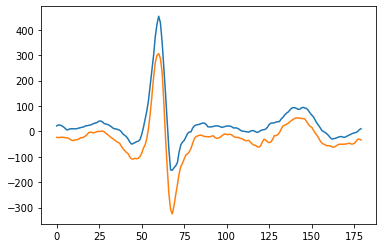

In [406]:
'''
trial plots
'''

plt.plot(np.max(templates_array[1], axis = 0))
plt.plot(np.min(templates_array[1], axis = 0))
plt.show()

In [416]:
'''
calculating array of medians, maximums and minimums, standard deviations
'''

mean_array = []
max_array = []
min_array = []
std_array = []

for i in range(xtrain_tr_filled.shape[0]):
    maximum = np.max(templates_array[i], axis = 0)
    minimum = np.min(templates_array[i], axis = 0)
    med = np.mean(templates_array[i], axis = 0)
    std = np.std(templates_array[i], axis = 0)
    mean_array.append(med)
    max_array.append(maximum)
    min_array.append(minimum)
    std_array.append(std)

In [ ]:
'''
FFT on mean_array 

See Gabriel's code
'''

In [402]:
'''

create new dataset


biosppy_dat = []
for  i in range(xtrain_tr_filled.shape[0]):
    row_i = np.concatenate([medians_array[1],min_array[1], 
                           max_array[i], std_array[i]])
    biosppy_dat.append(row_i)

biosppy_dat = pd.DataFrame(biosppy_dat)




xtrain_provisional_hb, xtest_hb, ytrain_provisional_hb, ytest_hb = train_test_split(biosppy_dat, 
                                                          ytrain, test_size=0.2, random_state=42)

xtrain_hb, xval_hb, ytrain_hb, yval_hb = train_test_split(xtrain_provisional_hb,   # test set = val set 
                                                          ytrain_provisional_hb, test_size=0.45, random_state=42)

'''

In [407]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

clf = SVC(C=100.0, kernel='rbf', gamma='auto_deprecated', 
            shrinking=True, probability=False, tol=0.001, cache_size=200, 
            class_weight='balanced', verbose=False, max_iter=-1, 
            decision_function_shape='ovr', random_state=2)

# See whether it is classifying correctly
clf.fit(xtrain_hb, ytrain_hb)
predy = clf.predict(xval_hb)
print(sklearn.metrics.classification_report(yval_hb, predy))

              precision    recall  f1-score   support

           0       0.57      1.00      0.72      1043
           1       0.00      0.00      0.00       156
           2       0.00      0.00      0.00       577
           3       0.00      0.00      0.00        66

    accuracy                           0.57      1842
   macro avg       0.14      0.25      0.18      1842
weighted avg       0.32      0.57      0.41      1842

